# PSO



In [ ]:
! sudo apt-get install texlive-latex-recommended
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! apt install cm-super
! pip install deap mealpy opfunu numpy matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mealpy.evolutionary_based import GA
from mealpy.swarm_based.PSO import OriginalPSO
from opfunu.cec_based.cec2014 import F12014, F62014
from mealpy import FloatVar

import numpy as np
import numba
from numba import jit


Atividades

Aplique o algoritmoPSO, pode ser utilizado o framework do mealpy, conforme a documentacao a seguir para as mesmas funções a seguir. Compare o desempenho do algoritmo executando com as seguintes configurações de individuos e iterações




In [2]:
problem_size = 10  # 10 variáveis
bounds = [-100, 100]  # Intervalo das variáveis de [-100, 100]
c1 = c2 = 2.0
num_repeats = 30
w_max = 0.9
w_min = 0.4

configs = [
    {"name": "Config 1", "epoch": 500, "pop_size": 30},
    {"name": "Config 2", "epoch": 1000, "pop_size": 50},
    {"name": "Config 3", "epoch": 2000, "pop_size": 100}
]

In [5]:
def train_model(model:str = "PSO", problem:str = "f6"):

    results = []
    configs = [
        {"name": "Config 1", "epoch": 500, "pop_size": 30},
        {"name": "Config 2", "epoch": 1000, "pop_size": 50},
        {"name": "Config 3", "epoch": 2000, "pop_size": 100}
    ]
    
    for config in configs:
        print(f"\nExecutando {config['name']}: Epoch={config['epoch']}, Pop_size={config['pop_size']}")
        
        main_problem = {}
        
        if problem == "f1":
            f1 = F12014(ndim=problem_size)
            problem_dict = {"obj_func": f1.evaluate}
        elif problem == "f6":
            f6 = F62014(ndim=problem_size)
            problem_dict = {"obj_func": f6.evaluate}
        else:
            return None
        
        metadata_dict = {
                "bounds": FloatVar(lb=[-100] * problem_size, ub=[100] * problem_size),
                "minmax": "min",
                "name": f"Config-{config['name']}"
        }
        
        main_problem.update(problem_dict)
        main_problem.update(metadata_dict)
        print(main_problem)
        
        algorithm = None
        if model == "GA":
            algorithm = GA.BaseGA(
                epoch=config['epoch'],
                pop_size=config['pop_size'],
                pc=0.95,  # Taxa de crossover padrão
                pm=0.025  # Taxa de mutação padrão
            )
        elif model == "PSO":
            algorithm = OriginalPSO(
                epoch=config["epoch"],
                pop_size=config["pop_size"],
                c1=c1,
                c2=c2,
                w_min=w_min,
                w_max=w_max
             )
        else:
            return None

        best_agent = algorithm.solve(main_problem)

        best_position = best_agent.solution
        best_fitness = best_agent.target.fitness

        print(f"\tMelhor fitness: {best_fitness}")
        print(f"\tMelhor posição: {best_position}")

        results.append({
            "config": config,
            "best_fitness": best_fitness,
            "best_position": best_position,
            "fitness_history": algorithm.history.list_global_best_fit,
            "exploration_history": algorithm.history.list_exploration,
            "exploitation_history": algorithm.history.list_exploitation
        })
    
    return results

In [3]:
import concurrent.futures

def train_model(model:str = "PSO", problem:str = "f6"):
    configs = [
        {"name": "Config 1", "epoch": 500, "pop_size": 30},
        {"name": "Config 2", "epoch": 1000, "pop_size": 50},
        {"name": "Config 3", "epoch": 2000, "pop_size": 100}
    ]
    
    def process_config(config):
        print(f"\nExecutando {config['name']}: Epoch={config['epoch']}, Pop_size={config['pop_size']}")
        
        main_problem = {}
        
        if problem == "f1":
            f1 = F12014(ndim=problem_size)
            problem_dict = {"obj_func": f1.evaluate}
        elif problem == "f6":
            f6 = F62014(ndim=problem_size)
            problem_dict = {"obj_func": f6.evaluate}
        else:
            return None
        
        metadata_dict = {
                "bounds": FloatVar(lb=[-100] * problem_size, ub=[100] * problem_size),
                "minmax": "min",
                "name": f"Config-{config['name']}"
        }
        
        main_problem.update(problem_dict)
        main_problem.update(metadata_dict)
        print(main_problem)
        
        algorithm = None
        if model == "GA":
            algorithm = GA.BaseGA(
                epoch=config['epoch'],
                pop_size=config['pop_size'],
                pc=0.95,  # Taxa de crossover padrão
                pm=0.025  # Taxa de mutação padrão
            )
        elif model == "PSO":
            algorithm = OriginalPSO(
                epoch=config["epoch"],
                pop_size=config["pop_size"],
                c1=c1,
                c2=c2,
                w_min=w_min,
                w_max=w_max
             )
        else:
            return None

        best_agent = algorithm.solve(main_problem)

        best_position = best_agent.solution
        best_fitness = best_agent.target.fitness

        print(f"\tMelhor fitness: {best_fitness}")
        print(f"\tMelhor posição: {best_position}")

        return {
            "config": config,
            "best_fitness": best_fitness,
            "best_position": best_position,
            "fitness_history": algorithm.history.list_global_best_fit,
            "exploration_history": algorithm.history.list_exploration,
            "exploitation_history": algorithm.history.list_exploitation
        }
    
    results = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # Submeter todas as configurações para execução em paralelo
        futures = [executor.submit(process_config, config) for config in configs]
        
        # Coletar resultados na ordem de conclusão
        for future in concurrent.futures.as_completed(futures):
            try:
                result = future.result()
                if result is not None:
                    results.append(result)
            except Exception as exc:
                print(f'A configuração gerou uma exceção: {exc}')
    
    return results

In [4]:
def plot_results(results, algo_name: str = "PSO", function_name = "f6"):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 1, 1)
    for result in results:
        plt.plot(result["fitness_history"],
                label=f"{result['config']['name']} (Best: {result['best_fitness']:.4f})")

    plt.title(f'Evolução do Fitness Global - {algo_name} - {function_name}')
    plt.xlabel('Iterações')
    plt.ylabel('Fitness')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    for result in results:
        plt.plot(result["exploration_history"],
                label=f"{result['config']['name']} - Exploration")
        plt.plot(result["exploitation_history"],
                linestyle='--',
                label=f"{result['config']['name']} - Exploitation")

    plt.title(f'Exploração vs Exploitação - {algo_name} - {function_name}')
    plt.xlabel('Iterações')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'results/resultados_comparacao_{algo_name}_{function_name}.png', dpi=300)
    plt.show()

    print("\nComparação de resultados:")
    for result in results:
        print(f"{result['config']['name']} - Epoch: {result['config']['epoch']}, Pop_size: {result['config']['pop_size']}")
        print(f"  Melhor fitness: {result['best_fitness']}")
        print(f"  Razão média Exploration/Exploitation: {np.mean(result['exploration_history'])/np.mean(result['exploitation_history']):.4f}")

A primeira função é a Rotated High Conditioned Elliptic Function.

![Rotated High Conditioned Elliptic Function](../images/high-conditioned-elliptic-function.png)

Segunda função é a F6 - Shifted and Rotated Weierstrass Function. Essa é uma função chamada de multimodal, onde existem muitos picos.

![Wierstrass Function](../images/weierstrass-function.png)


2025/05/09 02:38:25 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 02:38:25 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 02:38:25 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 02:38:25 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 1, Current best: 613.5257065059014, Global best: 613.5257065059014, Runtime: 0.06493 seconds
2025/05/09 02:38:25 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 1, Current best: 614.417807627735, Global best: 614.417807627735, Runtime: 0.09103 seconds



Executando Config 1: Epoch=500, Pop_size=30

Executando Config 2: Epoch=1000, Pop_size=50

Executando Config 3: Epoch=2000, Pop_size=100
{'obj_func': <bound method F62014.evaluate of <opfunu.cec_based.cec2014.F62014 object at 0x00000285EA7A78C0>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x00000285EA7A7B60>, 'minmax': 'min', 'name': 'Config-Config 1'}
{'obj_func': <bound method F62014.evaluate of <opfunu.cec_based.cec2014.F62014 object at 0x00000285EA693B10>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x00000285EA92C190>, 'minmax': 'min', 'name': 'Config-Config 2'}
{'obj_func': <bound method F62014.evaluate of <opfunu.cec_based.cec2014.F62014 object at 0x00000285EA92C050>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x00000285EA92C910>, 'minmax': 'min', 'name': 'Config-Config 3'}


2025/05/09 02:38:25 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 2, Current best: 613.5257065059014, Global best: 613.5257065059014, Runtime: 0.06298 seconds
2025/05/09 02:38:25 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 2, Current best: 613.4961074227907, Global best: 613.4961074227907, Runtime: 0.03619 seconds
2025/05/09 02:38:25 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 1, Current best: 612.1554617998247, Global best: 612.1554617998247, Runtime: 0.07679 seconds
2025/05/09 02:38:25 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 3, Current best: 611.4146533795358, Global best: 611.4146533795358, Runtime: 0.02283 seconds
2025/05/09 02:38:25 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 3, Current best: 612.7298922402549, Global best: 612.7298922402549, Runtime: 0.01990 seconds
2025/05/09 02:38:25 PM, I

	Melhor fitness: 603.639939217333
	Melhor posição: [ 59.33544478   8.10155707  60.92517006 -37.464896   -29.10908607
  58.30359173  70.37156546  23.28725546 -47.49805991 -40.05460294]


2025/05/09 02:38:53 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 405, Current best: 605.2600869456743, Global best: 605.2600869456743, Runtime: 0.03398 seconds
2025/05/09 02:38:53 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 256, Current best: 600.8795827412027, Global best: 600.8795827412027, Runtime: 0.07289 seconds
2025/05/09 02:38:53 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 406, Current best: 605.2600869456743, Global best: 605.2600869456743, Runtime: 0.06131 seconds
2025/05/09 02:38:53 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 407, Current best: 605.2600869456743, Global best: 605.2600869456743, Runtime: 0.03164 seconds
2025/05/09 02:38:53 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 257, Current best: 600.879582741066, Global best: 600.879582741066, Runtime: 0.08801 seconds
2025/05/09 02:38:

	Melhor fitness: 605.2600869456738
	Melhor posição: [ 21.0798166   -3.16925001  46.03500647 -35.31387823 -91.24076589
 -75.1413455    5.90569069 -29.66711552  16.63676525  34.40917784]


2025/05/09 02:39:21 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 614, Current best: 600.8795827406107, Global best: 600.8795827406107, Runtime: 0.04133 seconds
2025/05/09 02:39:21 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 615, Current best: 600.8795827406107, Global best: 600.8795827406107, Runtime: 0.05514 seconds
2025/05/09 02:39:21 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 616, Current best: 600.8795827406107, Global best: 600.8795827406107, Runtime: 0.06036 seconds
2025/05/09 02:39:21 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 617, Current best: 600.8795827406107, Global best: 600.8795827406107, Runtime: 0.03444 seconds
2025/05/09 02:39:21 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 618, Current best: 600.8795827406107, Global best: 600.8795827406107, Runtime: 0.03639 seconds
2025/05/09 02:3

	Melhor fitness: 600.8795827406107
	Melhor posição: [ 11.35420267   6.50275361  59.17840312 -37.64021071  48.55251141
 -60.50177471 -59.78368698  18.30124002   2.12484942  17.98918123]


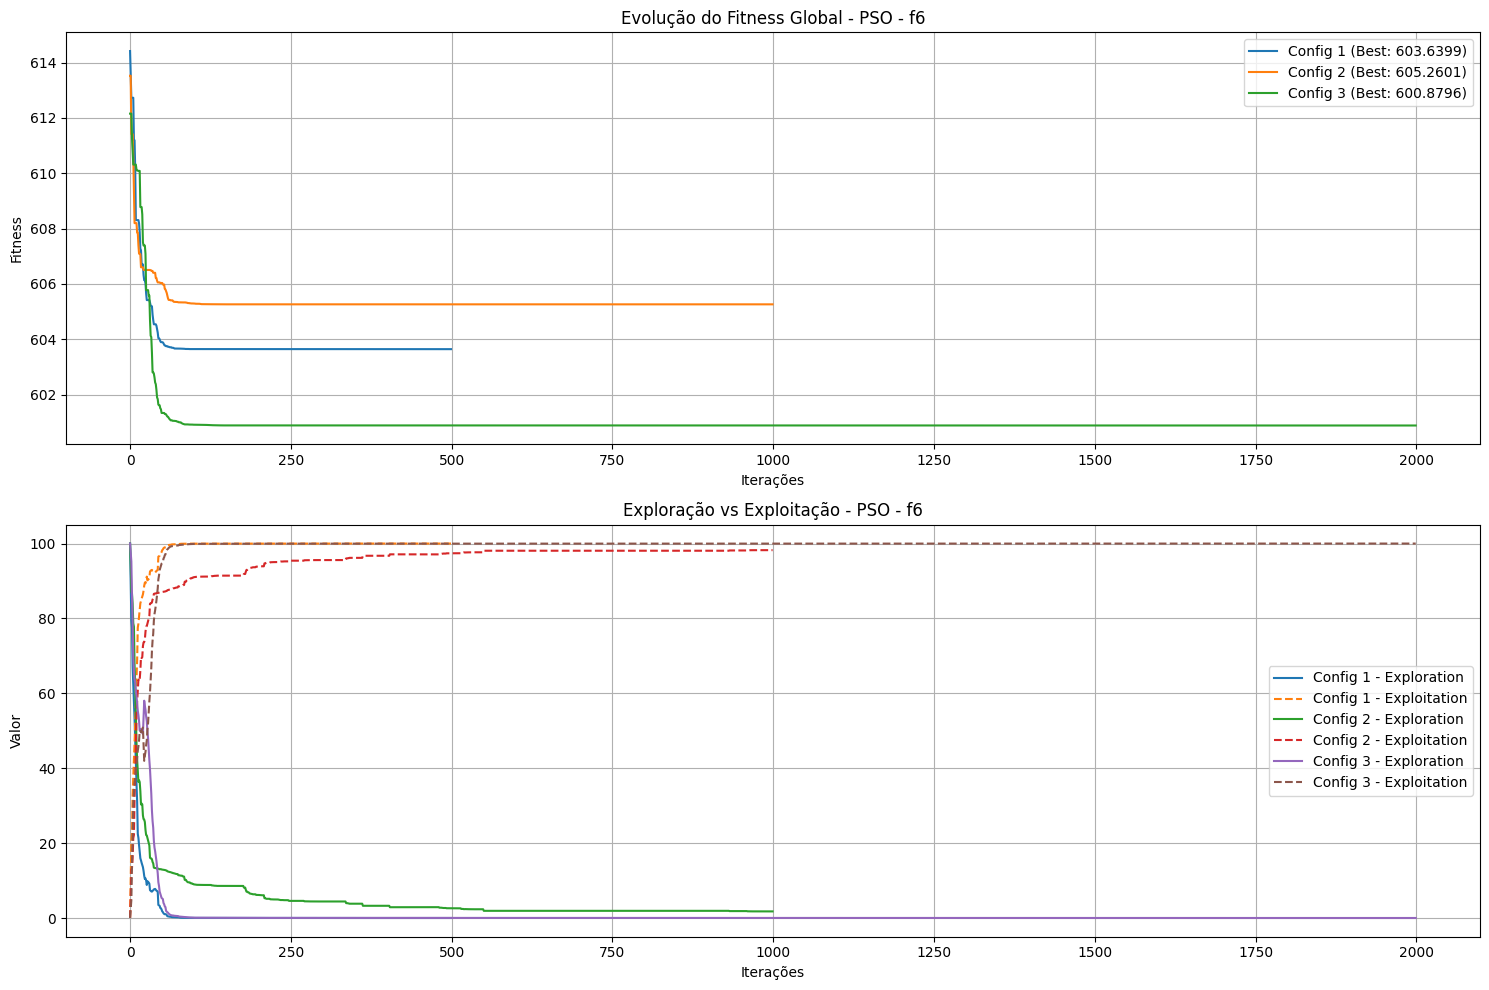

2025/05/09 02:40:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09 02:40:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09 02:40:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09 02:40:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 1, Epoch: 1, Current best: 614.003517466909, Global best: 614.003517466909, Runtime: 0.09481 seconds
2025/05/09 02:40:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 2, Epoch: 1, Current best: 612.0592220580672, Global best: 612.0592220580672, Runtime: 0.12795 seconds
2025/05/09 02:40:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 1, Epoch: 2, Current best: 613.908532629735, Global best: 613.908532629735, Runtime: 0.05142 seconds



Comparação de resultados:
Config 1 - Epoch: 500, Pop_size: 30
  Melhor fitness: 603.639939217333
  Razão média Exploration/Exploitation: 0.0231
Config 2 - Epoch: 1000, Pop_size: 50
  Melhor fitness: 605.2600869456738
  Razão média Exploration/Exploitation: 0.0547
Config 3 - Epoch: 2000, Pop_size: 100
  Melhor fitness: 600.8795827406107
  Razão média Exploration/Exploitation: 0.0115

Executando Config 1: Epoch=500, Pop_size=30

Executando Config 2: Epoch=1000, Pop_size=50

Executando Config 3: Epoch=2000, Pop_size=100
{'obj_func': <bound method F62014.evaluate of <opfunu.cec_based.cec2014.F62014 object at 0x00000285EA974510>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x00000285EA9756E0>, 'minmax': 'min', 'name': 'Config-Config 1'}
{'obj_func': <bound method F62014.evaluate of <opfunu.cec_based.cec2014.F62014 object at 0x00000285EA975350>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x00000285EA975A70>, 'minmax': 'min', 'name': 'Config-Config 2'}
{'obj_func': <bound method

2025/05/09 02:40:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 1, Current best: 611.3785751589395, Global best: 611.3785751589395, Runtime: 0.08011 seconds
2025/05/09 02:40:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 1, Epoch: 3, Current best: 613.7694533306517, Global best: 613.7694533306517, Runtime: 0.04791 seconds
2025/05/09 02:40:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 2, Epoch: 2, Current best: 611.8896168526701, Global best: 611.8896168526701, Runtime: 0.09036 seconds
2025/05/09 02:40:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 1, Epoch: 4, Current best: 613.400266283438, Global best: 613.400266283438, Runtime: 0.08388 seconds
2025/05/09 02:40:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 2, Current best: 610.1031800909309, Global best: 610.1031800909309, Runtime: 0.14860 seconds
2025/05/09 02:40:16 PM

	Melhor fitness: 604.8973589390464
	Melhor posição: [ 12.88404402 -21.40726347  84.42542304  -5.58276591  95.4802281
 -61.36661848  -7.95734892  59.59557578  -3.34954918  22.59151366]


2025/05/09 02:40:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 2, Epoch: 377, Current best: 602.5933360662681, Global best: 602.5933360662681, Runtime: 0.06320 seconds
2025/05/09 02:40:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 2, Epoch: 378, Current best: 602.5933360662681, Global best: 602.5933360662681, Runtime: 0.05603 seconds
2025/05/09 02:40:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 225, Current best: 604.7418426608571, Global best: 604.7418426608571, Runtime: 0.13378 seconds
2025/05/09 02:40:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 2, Epoch: 379, Current best: 602.5933360662681, Global best: 602.5933360662681, Runtime: 0.04430 seconds
2025/05/09 02:40:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 2, Epoch: 380, Current best: 602.5933360662681, Global best: 602.5933360662681, Runtime: 0.05472 seconds
2025/05/09

	Melhor fitness: 602.1843014241559
	Melhor posição: [ 16.04901473   6.86591587  59.0399321  -37.88969046  72.98748078
 -58.50662689  29.55088959 -92.03772903   0.3099545   26.33481919]


2025/05/09 02:41:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 505, Current best: 604.5631910034982, Global best: 604.5631910034982, Runtime: 0.04328 seconds
2025/05/09 02:41:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 506, Current best: 604.5631910034982, Global best: 604.5631910034982, Runtime: 0.04030 seconds
2025/05/09 02:41:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 507, Current best: 604.5631910034982, Global best: 604.5631910034982, Runtime: 0.04315 seconds
2025/05/09 02:41:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 508, Current best: 604.5631910034982, Global best: 604.5631910034982, Runtime: 0.04802 seconds
2025/05/09 02:41:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 509, Current best: 604.5631910034982, Global best: 604.5631910034982, Runtime: 0.04382 seconds
2025/05/09

	Melhor fitness: 603.8085812835759
	Melhor posição: [ 27.40149871   2.67996216  56.34573755 -38.93266244  57.66236912
 -64.56105932  35.26527128 -98.62308054 -52.20246406  62.45716976]


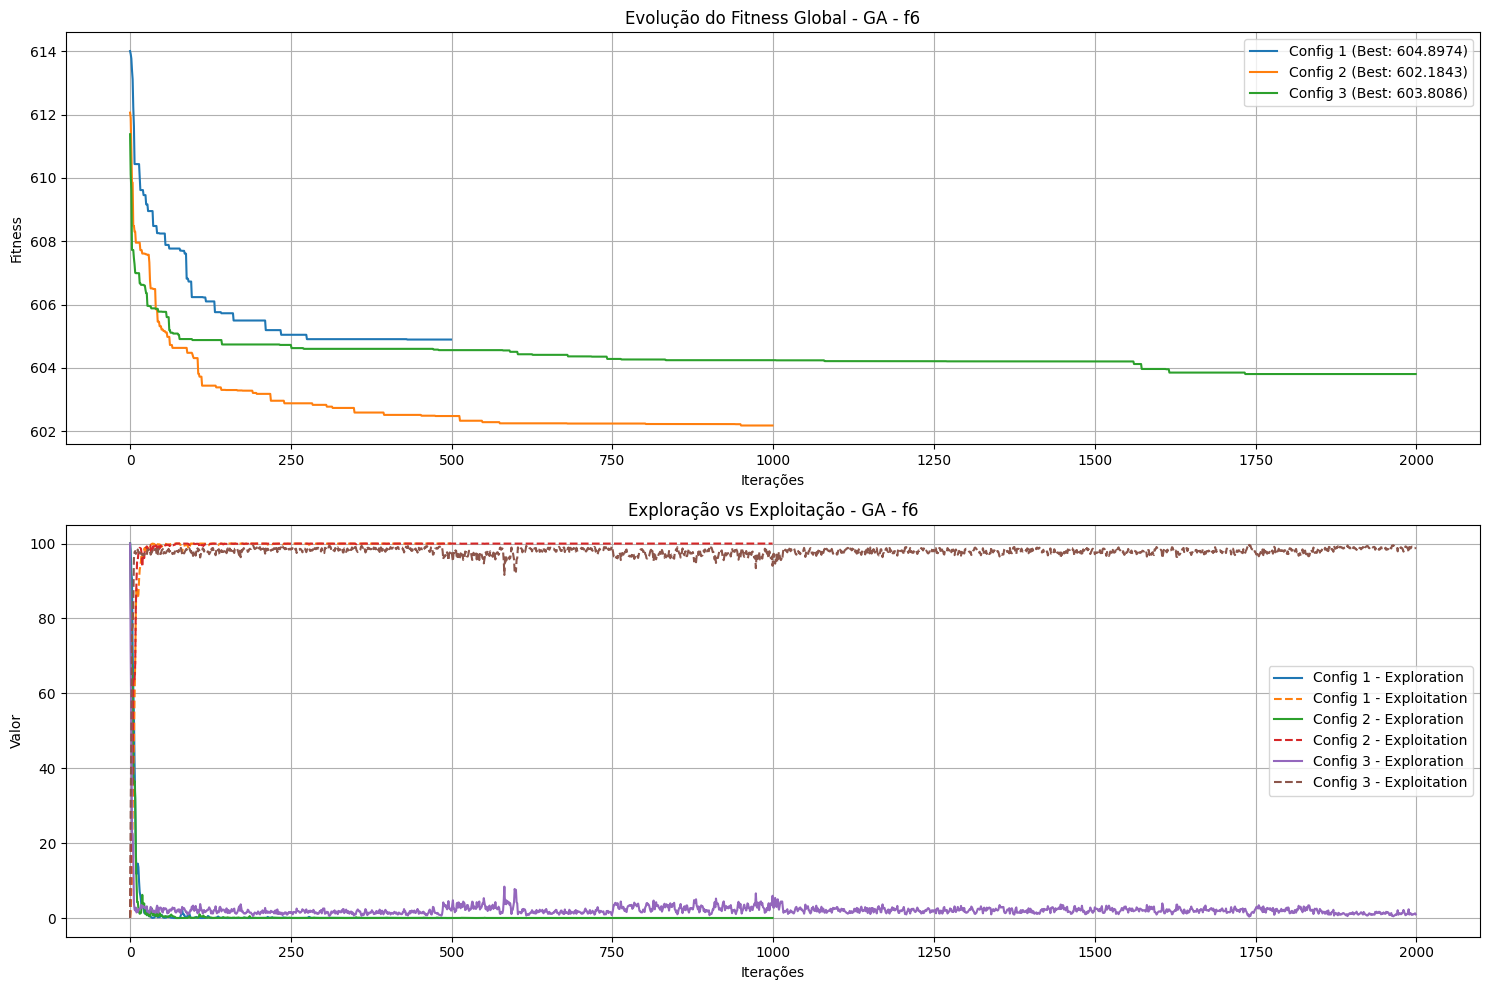

2025/05/09 02:42:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 02:42:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 02:42:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 02:42:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 1, Current best: 190002838.3259972, Global best: 190002838.3259972, Runtime: 0.02117 seconds
2025/05/09 02:42:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 1, Current best: 189753785.39014816, Global best: 189753785.39014816, Runtime: 0.01724 seconds
2025/05/09 02:42:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 2, Current best: 128418874.7727197, Global best: 128418874.7727197, Runtime: 0.01739 seconds
2025/05/09 02:42:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Probl


Comparação de resultados:
Config 1 - Epoch: 500, Pop_size: 30
  Melhor fitness: 604.8973589390464
  Razão média Exploration/Exploitation: 0.0163
Config 2 - Epoch: 1000, Pop_size: 50
  Melhor fitness: 602.1843014241559
  Razão média Exploration/Exploitation: 0.0065
Config 3 - Epoch: 2000, Pop_size: 100
  Melhor fitness: 603.8085812835759
  Razão média Exploration/Exploitation: 0.0224

Executando Config 1: Epoch=500, Pop_size=30

Executando Config 2: Epoch=1000, Pop_size=50

Executando Config 3: Epoch=2000, Pop_size=100
{'obj_func': <bound method F12014.evaluate of <opfunu.cec_based.cec2014.F12014 object at 0x00000285EA92D2B0>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x00000285EA889BF0>, 'minmax': 'min', 'name': 'Config-Config 1'}
{'obj_func': <bound method F12014.evaluate of <opfunu.cec_based.cec2014.F12014 object at 0x00000285EABC5450>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x00000285EA8896A0>, 'minmax': 'min', 'name': 'Config-Config 2'}
{'obj_func': <bound metho

2025/05/09 02:42:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 6, Current best: 64933112.08944235, Global best: 64933112.08944235, Runtime: 0.02320 seconds
2025/05/09 02:42:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 5, Current best: 37884017.4787222, Global best: 37884017.4787222, Runtime: 0.02170 seconds
2025/05/09 02:42:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 3, Current best: 20463613.99425507, Global best: 20463613.99425507, Runtime: 0.03817 seconds
2025/05/09 02:42:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 7, Current best: 60175240.29107511, Global best: 60175240.29107511, Runtime: 0.00416 seconds
2025/05/09 02:42:38 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 6, Current best: 24854826.841567904, Global best: 24854826.841567904, Runtime: 0.01789 seconds
2025/05/09 02:42:38 PM, I

	Melhor fitness: 17312.714945124917
	Melhor posição: [ 51.93011198  65.09875154 -63.0611565   61.0609253   15.26103903
 -48.49067614 -42.77580949   3.46112899  70.86195613  86.97053442]


2025/05/09 02:42:49 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 445, Current best: 748.3749001672118, Global best: 748.3749001672118, Runtime: 0.01084 seconds
2025/05/09 02:42:49 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 336, Current best: 17262.7967790746, Global best: 17262.7967790746, Runtime: 0.03106 seconds
2025/05/09 02:42:49 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 446, Current best: 747.8679574080309, Global best: 747.8679574080309, Runtime: 0.01152 seconds
2025/05/09 02:42:49 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 337, Current best: 17262.795196923253, Global best: 17262.795196923253, Runtime: 0.01735 seconds
2025/05/09 02:42:49 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 2, Epoch: 447, Current best: 747.3192102632793, Global best: 747.3192102632793, Runtime: 0.01412 seconds
2025/05/09 02:4

	Melhor fitness: 638.3040461054277
	Melhor posição: [ 51.71638523  64.90676881 -61.55943216  66.15466461  21.04257299
 -57.84754821 -35.60658981   5.35209857  71.9403259   80.56428703]


2025/05/09 02:42:59 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 737, Current best: 15876.565229571685, Global best: 15876.565229571685, Runtime: 0.00831 seconds
2025/05/09 02:42:59 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 738, Current best: 15874.928683205586, Global best: 15874.928683205586, Runtime: 0.00892 seconds
2025/05/09 02:42:59 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 739, Current best: 15871.235258883602, Global best: 15871.235258883602, Runtime: 0.01063 seconds
2025/05/09 02:42:59 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 740, Current best: 15867.26405472819, Global best: 15867.26405472819, Runtime: 0.01212 seconds
2025/05/09 02:42:59 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 3, Epoch: 741, Current best: 15864.739483773697, Global best: 15864.739483773697, Runtime: 0.01361 seconds
2025/05

	Melhor fitness: 3366.607831622808
	Melhor posição: [ 46.98037149  64.61846884 -57.16675077  62.24835711  16.12323027
 -83.35874901 -41.56149575  10.42174497  74.88508728  57.26028646]


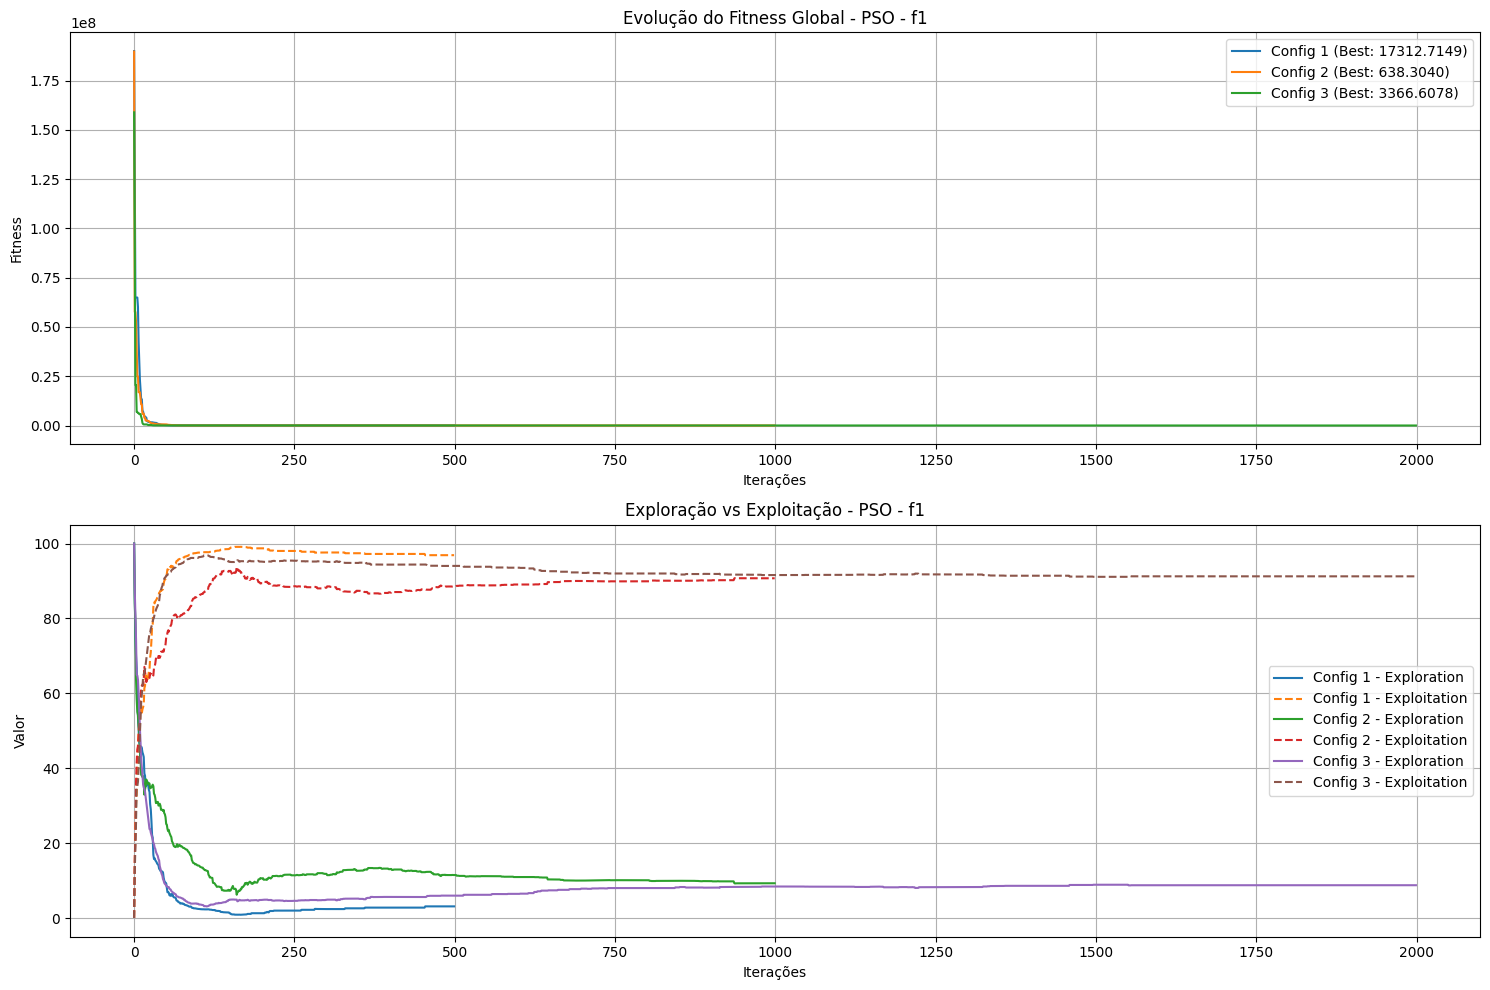

2025/05/09 02:43:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09 02:43:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 1, Epoch: 1, Current best: 130820716.53259724, Global best: 130820716.53259724, Runtime: 0.00840 seconds
2025/05/09 02:43:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09 02:43:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09 02:43:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 1, Epoch: 2, Current best: 50244309.38174938, Global best: 50244309.38174938, Runtime: 0.04040 seconds
2025/05/09 02:43:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 1, Epoch: 3, Current best: 51817810.19045234, Global best: 50244309.38174938, Runtime: 0.02245 seconds
2025/05/09 02:43:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >


Comparação de resultados:
Config 1 - Epoch: 500, Pop_size: 30
  Melhor fitness: 17312.714945124917
  Razão média Exploration/Exploitation: 0.0584
Config 2 - Epoch: 1000, Pop_size: 50
  Melhor fitness: 638.3040461054277
  Razão média Exploration/Exploitation: 0.1440
Config 3 - Epoch: 2000, Pop_size: 100
  Melhor fitness: 3366.607831622808
  Razão média Exploration/Exploitation: 0.0885

Executando Config 1: Epoch=500, Pop_size=30

Executando Config 2: Epoch=1000, Pop_size=50

Executando Config 3: Epoch=2000, Pop_size=100
{'obj_func': <bound method F12014.evaluate of <opfunu.cec_based.cec2014.F12014 object at 0x00000285EA86A520>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x00000285EA886850>, 'minmax': 'min', 'name': 'Config-Config 1'}
{'obj_func': <bound method F12014.evaluate of <opfunu.cec_based.cec2014.F12014 object at 0x00000285EA86B100>>, 'bounds': <mealpy.utils.space.FloatVar object at 0x00000285EA8E55E0>, 'minmax': 'min', 'name': 'Config-Config 2'}
{'obj_func': <bound meth

2025/05/09 02:43:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 1, Epoch: 7, Current best: 95636245.54554239, Global best: 50244309.38174938, Runtime: 0.02371 seconds
2025/05/09 02:43:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 2, Epoch: 4, Current best: 65866638.661389455, Global best: 65866638.661389455, Runtime: 0.03253 seconds
2025/05/09 02:43:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 1, Epoch: 8, Current best: 68664951.74348973, Global best: 50244309.38174938, Runtime: 0.02476 seconds
2025/05/09 02:43:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 3, Current best: 100830472.6940919, Global best: 100830472.6940919, Runtime: 0.06035 seconds
2025/05/09 02:43:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 1, Epoch: 9, Current best: 53945320.5693217, Global best: 50244309.38174938, Runtime: 0.02635 seconds
2025/05/09 02:43:15

	Melhor fitness: 4488810.82894163
	Melhor posição: [ 1.18564806e+01  7.38378111e+01 -9.90191895e+01  7.87660841e+01
  6.80667560e+01 -9.51277130e+01  1.69861196e+01 -3.72373003e+01
  4.71033745e+01 -6.58262230e-02]


2025/05/09 02:43:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 204, Current best: 13917221.669243095, Global best: 13917221.669243095, Runtime: 0.04211 seconds
2025/05/09 02:43:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 2, Epoch: 343, Current best: 6580251.191103366, Global best: 6580251.191103366, Runtime: 0.01210 seconds
2025/05/09 02:43:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 2, Epoch: 344, Current best: 6580251.191103366, Global best: 6580251.191103366, Runtime: 0.03167 seconds
2025/05/09 02:43:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 205, Current best: 13917221.669243095, Global best: 13917221.669243095, Runtime: 0.06451 seconds
2025/05/09 02:43:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 2, Epoch: 345, Current best: 6580251.191103366, Global best: 6580251.191103366, Runtime: 0.02866 seconds
2025/0

	Melhor fitness: 6211491.511054324
	Melhor posição: [  3.89252468  68.97118102 -83.0088565   70.55613634  38.29803405
 -95.22465932 -17.21499187 -18.83187595  57.49767012 -10.57575023]


2025/05/09 02:43:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 504, Current best: 3680599.050882292, Global best: 3680599.050882292, Runtime: 0.01878 seconds
2025/05/09 02:43:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 505, Current best: 3680599.050882292, Global best: 3680599.050882292, Runtime: 0.01721 seconds
2025/05/09 02:43:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 506, Current best: 3680599.050882292, Global best: 3680599.050882292, Runtime: 0.01625 seconds
2025/05/09 02:43:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 507, Current best: 3680599.050882292, Global best: 3680599.050882292, Runtime: 0.01797 seconds
2025/05/09 02:43:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: Config-Config 3, Epoch: 508, Current best: 3680599.050882292, Global best: 3680599.050882292, Runtime: 0.01714 seconds
2025/05/09

	Melhor fitness: 973017.9415451635
	Melhor posição: [ 32.2123132   62.68915027 -21.35141893  62.61384523  11.98662594
 -82.66878671 -44.33651677  51.48527612  98.9619335   37.30618621]


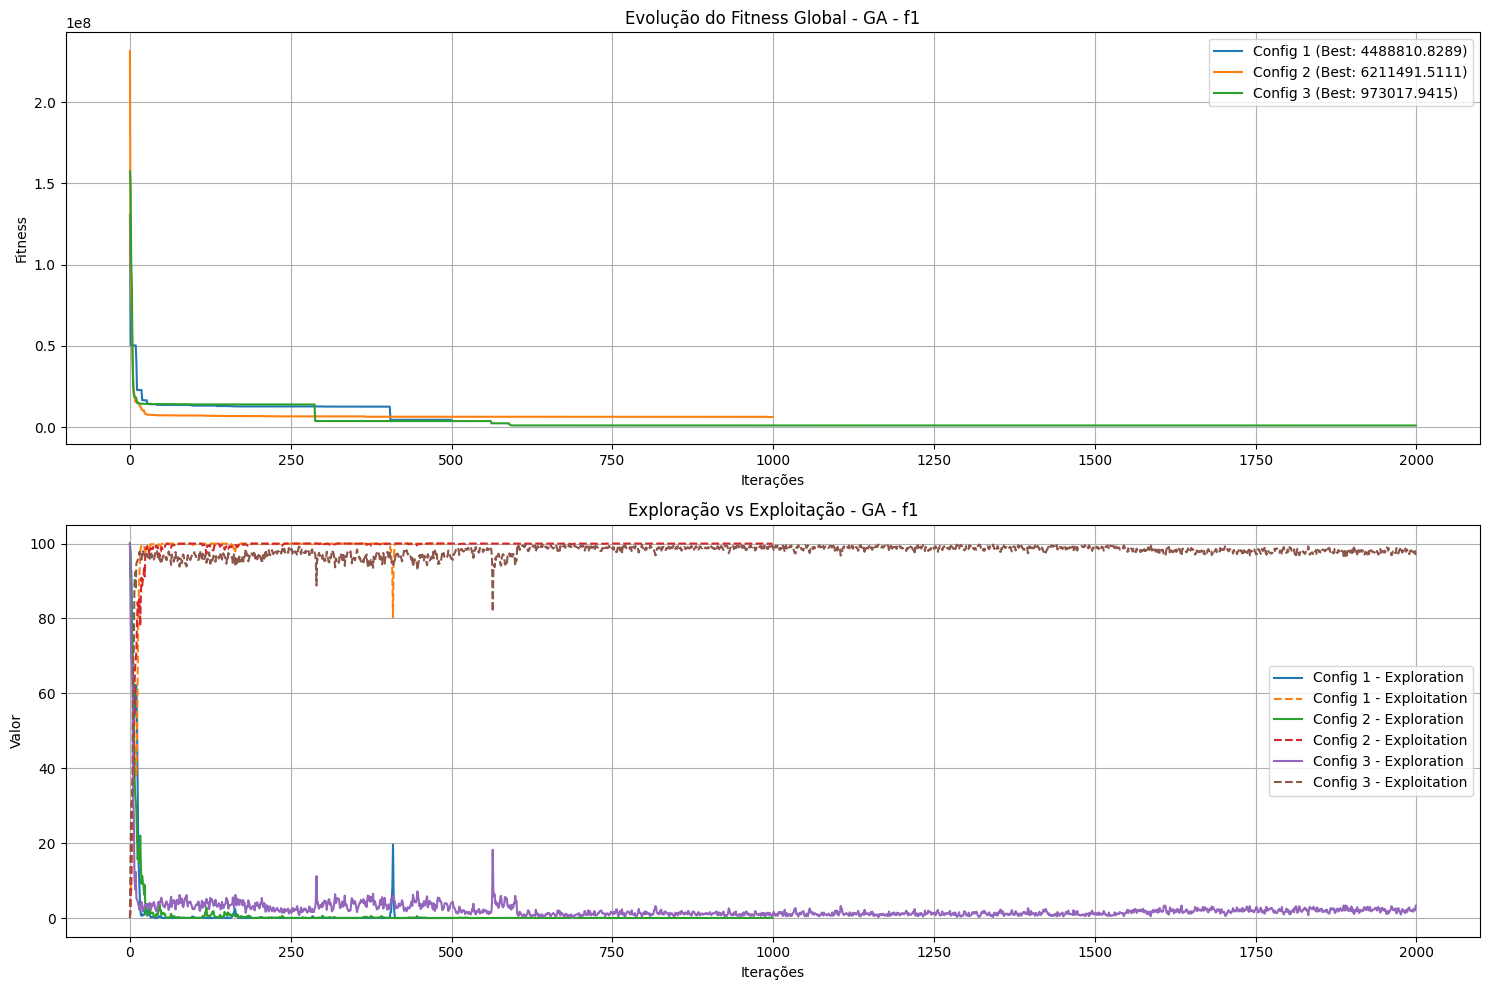


Comparação de resultados:
Config 1 - Epoch: 500, Pop_size: 30
  Melhor fitness: 4488810.82894163
  Razão média Exploration/Exploitation: 0.0202
Config 2 - Epoch: 1000, Pop_size: 50
  Melhor fitness: 6211491.511054324
  Razão média Exploration/Exploitation: 0.0100
Config 3 - Epoch: 2000, Pop_size: 100
  Melhor fitness: 973017.9415451635
  Razão média Exploration/Exploitation: 0.0226


In [5]:
problem_list = ["f6", "f1"]
model_list = ["PSO", "GA"]

for problem in problem_list:
    for model in model_list:
        results = train_model(model=model, problem=problem)
        plot_results(results=results, algo_name=model, function_name=problem)

In [ ]:
import concurrent.futures

problem_list = ["f6", "f1"]
model_list = ["PSO", "GA"]

def process_combination(args):
    model, problem = args
    print(f"Executando modelo {model} com problema {problem}")
    results = train_model(model=model, problem=problem)
    plot_results(results=results, algo_name=model, function_name=problem)
    return f"Concluído: {model} - {problem}"

# Criar todas as combinações de modelo e problema
combinations = [(model, problem) for problem in problem_list for model in model_list]

# Executar todas as combinações em paralelo
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_combination, combo) for combo in combinations]
    
    # Aguardar a conclusão de todas as tarefas
    for future in concurrent.futures.as_completed(futures):
        try:
            result = future.result()
            print(result)
        except Exception as exc:
            print(f'Uma combinação gerou uma exceção: {exc}')

In [ ]:
import concurrent.futures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import threading

# Criando um lock para sincronizar prints
print_lock = threading.Lock()

def train_model_with_stats(model:str = "PSO", problem:str = "f6", num_repeats:int = 30):
    configs = [
        {"name": "Config 1", "epoch": 500, "pop_size": 30},
        {"name": "Config 2", "epoch": 1000, "pop_size": 50},
        {"name": "Config 3", "epoch": 2000, "pop_size": 100}
    ]
    
    # Inicializar os objetos de função aqui para garantir que estão disponíveis
    f1_obj = F12014(ndim=problem_size)
    f6_obj = F62014(ndim=problem_size)
    
    # Função que executa uma única repetição para uma configuração
    def run_single_trial(args):
        config, trial_num = args
        
        with print_lock:
            print(f"\nExecutando {model} - {problem} - {config['name']} - Repetição {trial_num+1}/{num_repeats}")
        
        main_problem = {}
        f1_obj = F12014(ndim=problem_size)
        f6_obj = F62014(ndim=problem_size)
        try:
            if problem == "f1":
                problem_dict = {"obj_func": f1_obj.evaluate}
            elif problem == "f6":
                problem_dict = {"obj_func": f6_obj.evaluate}
            else:
                with print_lock:
                    print(f"Problema desconhecido: {problem}")
                return None
            
            metadata_dict = {
                    "bounds": FloatVar(lb=[-100] * problem_size, ub=[100] * problem_size),
                    "minmax": "min",
                    "name": f"Config-{config['name']}"
            }
            
            main_problem.update(problem_dict)
            main_problem.update(metadata_dict)
            
            algorithm = None
            if model == "GA":
                algorithm = GA.BaseGA(
                    epoch=config['epoch'],
                    pop_size=config['pop_size'],
                    pc=0.95,  # Taxa de crossover padrão
                    pm=0.025  # Taxa de mutação padrão
                )
            elif model == "PSO":
                algorithm = OriginalPSO(
                    epoch=config["epoch"],
                    pop_size=config["pop_size"],
                    c1=c1,
                    c2=c2,
                    w_min=w_min,
                    w_max=w_max
                 )
            else:
                with print_lock:
                    print(f"Modelo desconhecido: {model}")
                return None

            best_agent = algorithm.solve(main_problem)

            best_position = best_agent.solution
            best_fitness = best_agent.target.fitness

            with print_lock:
                print(f"\tMelhor fitness: {best_fitness}")
            
            return {
                "config": config,
                "trial": trial_num,
                "best_fitness": best_fitness,
                "best_position": best_position,
                "fitness_history": algorithm.history.list_global_best_fit,
                "exploration_history": algorithm.history.list_exploration,
                "exploitation_history": algorithm.history.list_exploitation
            }
        except Exception as e:
            with print_lock:
                print(f"Erro na execução do teste ({model}, {problem}, {config['name']}, repetição {trial_num}): {e}")
            return None
    
    all_results = {}
    for config in configs:
        # Criar todas as combinações (config, trial_num)
        trial_args = [(config, trial_num) for trial_num in range(num_repeats)]
        
        config_results = []
        # Vamos limitar o número de workers para evitar sobrecarga
        with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
            # Submeter todas as repetições para execução em paralelo
            futures = [executor.submit(run_single_trial, args) for args in trial_args]
            
            # Coletar resultados na ordem de conclusão
            for future in concurrent.futures.as_completed(futures):
                try:
                    result = future.result()
                    if result is not None:
                        config_results.append(result)
                except Exception as exc:
                    with print_lock:
                        print(f'Um teste gerou uma exceção: {exc}')
        
        # Verificar se temos resultados para esta configuração
        if config_results:
            all_results[config["name"]] = config_results
        else:
            with print_lock:
                print(f"Aviso: Nenhum resultado válido para {model} - {problem} - {config['name']}")
    
    return all_results

def analyze_model_performance(model_results, model_name, problem_name):
    """Analisa os resultados de um modelo, calculando estatísticas e gerando gráficos"""
    stats_by_config = {}
    
    for config_name, results in model_results.items():
        # Verificar se há resultados
        if not results:
            print(f"Aviso: Nenhum resultado para analisar em {model_name} - {problem_name} - {config_name}")
            continue
            
        fitness_values = [r["best_fitness"] for r in results]
        
        # Verificar se temos algum valor para calcular estatísticas
        if not fitness_values:
            print(f"Aviso: Lista de fitness vazia para {model_name} - {problem_name} - {config_name}")
            continue
            
        # Calcular estatísticas
        stats_by_config[config_name] = {
            "mean": np.mean(fitness_values),
            "std": np.std(fitness_values),
            "median": np.median(fitness_values),
            "min": np.min(fitness_values),
            "max": np.max(fitness_values),
            "best_idx": np.argmin(fitness_values)  # índice do melhor resultado
        }
        
        # Salvar o melhor resultado de cada configuração
        stats_by_config[config_name]["best_result"] = results[stats_by_config[config_name]["best_idx"]]
    
    return stats_by_config

def compare_models(problem_name, models_stats):
    """Compara os resultados dos diferentes modelos para o problema"""
    # Verificar se temos estatísticas para comparar
    if not models_stats or all(not stats for model, stats in models_stats.items()):
        print(f"Não há dados suficientes para comparar modelos para o problema {problem_name}")
        return
        
    # Preparar dados para comparação
    comparison_data = []
    
    for model_name, model_stats in models_stats.items():
        if not model_stats:  # Se não houver estatísticas para este modelo
            continue
            
        for config_name, stats in model_stats.items():
            comparison_data.append({
                "Model": model_name,
                "Config": config_name,
                "Mean Fitness": stats["mean"],
                "Std Fitness": stats["std"],
                "Median Fitness": stats["median"],
                "Min Fitness": stats["min"],
                "Max Fitness": stats["max"],
            })
    
    # Verificar se temos dados para criar o DataFrame
    if not comparison_data:
        print(f"Sem dados para comparação no problema {problem_name}")
        return
        
    # Criar DataFrame para análise
    df = pd.DataFrame(comparison_data)
    
    try:
        # Plotar comparação de média e desvio padrão
        plt.figure(figsize=(15, 8))
        
        # Gráfico de barras para média
        plt.subplot(1, 2, 1)
        sns.barplot(x="Config", y="Mean Fitness", hue="Model", data=df)
        plt.title(f'Média do Fitness por Configuração - Problema {problem_name}')
        plt.grid(True)
        
        # Gráfico de barras para desvio padrão
        plt.subplot(1, 2, 2)
        sns.barplot(x="Config", y="Std Fitness", hue="Model", data=df)
        plt.title(f'Desvio Padrão do Fitness por Configuração - Problema {problem_name}')
        plt.grid(True)
        
        plt.tight_layout()
        plt.savefig(f'results/comparacao_modelos_{problem_name}.png', dpi=300)
        plt.show()
        
        # Verificar se temos configurações para plotar
        configs = df["Config"].unique()
        if len(configs) > 0:
            # Plotar distribuição dos resultados para cada configuração
            plt.figure(figsize=(15, len(configs) * 4))
            for i, config_name in enumerate(configs):
                plt.subplot(len(configs), 1, i+1)
                config_data = df[df["Config"] == config_name]
                
                # Verificar se temos dados suficientes para o violinplot
                if len(config_data) >= 2 and len(config_data["Model"].unique()) >= 2:
                    # Criar gráfico de violino para comparar distribuições
                    sns.violinplot(x="Model", y="Mean Fitness", data=config_data)
                    plt.title(f'Distribuição de Fitness - {config_name} - Problema {problem_name}')
                    plt.grid(True)
                else:
                    plt.text(0.5, 0.5, f"Dados insuficientes para gráfico de violino - {config_name}", 
                             horizontalalignment='center', verticalalignment='center')
            
            plt.tight_layout()
            plt.savefig(f'results/distribuicao_fitness_{problem_name}.png', dpi=300)
            plt.show()
        
        # Plotar histórico do melhor fitness para a melhor configuração de cada modelo
        plt.figure(figsize=(15, 6))
        
        # Encontrar a melhor configuração para cada modelo
        for model_name, model_stats in models_stats.items():
            if not model_stats:  # Pular modelo se não houver estatísticas
                continue
                
            try:
                best_config = min(model_stats.items(), key=lambda x: x[1]["mean"])
                config_name = best_config[0]
                
                # Plotar histórico de fitness do melhor resultado
                best_result = model_stats[config_name]["best_result"]
                plt.plot(best_result["fitness_history"], 
                         label=f'{model_name} - {config_name} (Best: {best_result["best_fitness"]:.4f})')
            except (ValueError, KeyError) as e:
                print(f"Erro ao encontrar melhor configuração para {model_name}: {e}")
        
        plt.title(f'Evolução do Melhor Fitness - Problema {problem_name}')
        plt.xlabel('Iterações')
        plt.ylabel('Fitness')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.savefig(f'results/best_fitness_history_{problem_name}.png', dpi=300)
        plt.show()
        
        # Exibir tabela de resultados
        print(f"\nComparação de resultados - Problema {problem_name}:")
        print(df.to_string(index=False))
        
        # Realizar teste estatístico para verificar significância
        for config_name in df["Config"].unique():
            config_data = df[df["Config"] == config_name]
            models_present = config_data["Model"].unique()
            
            # Verificar se temos tanto PSO quanto GA para comparar
            if "PSO" in models_present and "GA" in models_present:
                pso_data = config_data[config_data["Model"] == "PSO"]["Mean Fitness"].values
                ga_data = config_data[config_data["Model"] == "GA"]["Mean Fitness"].values
                
                # Verificar se temos dados suficientes para o teste
                if len(pso_data) > 0 and len(ga_data) > 0:
                    # Teste t para verificar se as diferenças são estatisticamente significativas
                    t_stat, p_value = stats.ttest_ind(pso_data, ga_data)
                    
                    print(f"\nTeste estatístico para {config_name} - Problema {problem_name}:")
                    print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
                    if p_value < 0.05:
                        if np.mean(pso_data) < np.mean(ga_data):
                            print(f"PSO é significativamente melhor que GA (p<0.05)")
                        else:
                            print(f"GA é significativamente melhor que PSO (p<0.05)")
                    else:
                        print(f"Não há diferença estatisticamente significativa entre PSO e GA (p>0.05)")
    except Exception as e:
        print(f"Erro ao gerar visualizações para {problem_name}: {e}")

# Executar todos os experimentos
problem_list = ["f6", "f1"]
model_list = ["PSO", "GA"]

# Função para executar um modelo com um problema
def process_model_problem(args):
    model, problem = args
    try:
        with print_lock:
            print(f"Iniciando experimentos para {model} - {problem}")
        results = train_model_with_stats(model=model, problem=problem, num_repeats=30)
        with print_lock:
            print(f"Concluído: {model} - {problem}")
        return model, problem, results
    except Exception as e:
        with print_lock:
            print(f"Erro ao processar {model} - {problem}: {e}")
        return model, problem, {}

# Criar todas as combinações
combinations = [(model, problem) for problem in problem_list for model in model_list]

# Vamos limitar o número de execuções paralelas em alto nível
all_results = {}
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_model_problem, combo) for combo in combinations]
    
    for future in concurrent.futures.as_completed(futures):
        try:
            model, problem, results = future.result()
            if problem not in all_results:
                all_results[problem] = {}
            all_results[problem][model] = results
        except Exception as exc:
            with print_lock:
                print(f'Um experimento gerou uma exceção: {exc}')

# Analisar resultados para cada problema
for problem in problem_list:
    if problem not in all_results:
        print(f"Nenhum resultado para o problema {problem}")
        continue
        
    models_stats = {}
    for model in model_list:
        if model not in all_results[problem]:
            print(f"Nenhum resultado para {model} - {problem}")
            models_stats[model] = {}
            continue
            
        try:
            models_stats[model] = analyze_model_performance(all_results[problem][model], model, problem)
        except Exception as e:
            print(f"Erro ao analisar desempenho para {model} - {problem}: {e}")
            models_stats[model] = {}
    
    # Comparar modelos para este problema
    try:
        compare_models(problem, models_stats)
    except Exception as e:
        print(f"Erro ao comparar modelos para {problem}: {e}")

2025/05/09 03:03:17 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 1, Current best: 613.728787914179, Global best: 613.728787914179, Runtime: 0.04716 seconds
2025/05/09 03

Iniciando experimentos para PSO - f6
Iniciando experimentos para GA - f6
Iniciando experimentos para PSO - f1
Iniciando experimentos para GA - f1

Executando PSO - f6 - Config 1 - Repetição 1/30

Executando PSO - f6 - Config 1 - Repetição 2/30

Executando PSO - f6 - Config 1 - Repetição 3/30

Executando GA - f6 - Config 1 - Repetição 1/30

Executando PSO - f1 - Config 1 - Repetição 1/30

Executando GA - f1 - Config 1 - Repetição 1/30

Executando PSO - f6 - Config 1 - Repetição 4/30

Executando GA - f6 - Config 1 - Repetição 2/30

Executando PSO - f1 - Config 1 - Repetição 2/30

Executando GA - f1 - Config 1 - Repetição 2/30

Executando PSO - f6 - Config 1 - Repetição 5/30

Executando GA - f6 - Config 1 - Repetição 3/30

Executando PSO - f1 - Config 1 - Repetição 3/30

Executando GA - f1 - Config 1 - Repetição 3/30

Executando GA - f6 - Config 1 - Repetição 4/30

Executando PSO - f1 - Config 1 - Repetição 4/30

Executando GA - f1 - Config 1 - Repetição 4/30

Executando GA - f6 - Config 

2025/05/09 03:03:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: >>>Problem: Config-Config 1, Epoch: 1, Current best: 609.3022835311456, Global best: 609.3022835311456, Runtime: 0.02526 seconds
2025/05/09 03:03:17 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.swarm_based.PSO.OriginalPSO: Solving single objective optimization problem.
2025/05/09 03:03:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/05/09